<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

######PARTE DEL TALLER NO 11 PARA  EXTRAER LOS DATOS

In [3]:
import pandas as pd
import tweepy
import re
import regex
import emoji
from nltk.corpus import stopwords


In [4]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
stopwords_sp = stopwords.words('spanish')

In [6]:
!pip install tweepy

In [2]:
!pip install emoji

     |████████████████████████████████| 133kB 2.9MB/s 


In [7]:
import pandas as pd
import tweepy

# Leer las llaves
keys = pd.read_csv("mis_llaves.csv", header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [8]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweets = tweepy.Cursor(api.search,
                       q=['vacuna COVID -RT'], ## -RT quitar los tuits duplicados 
                       lang='es', ##Español
                       geocode='4.7110,-74.0721,100km', ## buscar cprdenadas de Bogota en google  pilas occidente negativo (latitud, longitud, kilometro a la redonda )
                       tweet_mode='extended',
                       include_rts=False, ## en que tipo de telefono estan 
                       ).items(100) #Cuantos quiere que busque

In [10]:
tweets ## convertir en objecto  interador a  normal es decir lista

In [11]:
# Objecto generador
t = [tweet for tweet in tweets]

In [12]:
t[0].full_text

'Desde mañana los 116 alcaldes y alcaldesas de Cundinamarca podrán trabajar en sus municipios con la confianza de contar con la vacuna contra el COVID-19. Los necesitamos en el territorio liderando y sacando proyectos adelante. Mañana esperamos vacunarlos a todos.'

In [13]:
t[1].full_text

'La mayoría de la población de Israel ha recibido la vacuna de Pfizer-BioNTech y alrededor de 92% de los mayores de 50 años han sido inoculados https://t.co/rkZxJANiuW'

In [14]:
t[0].user.location

'Mosquera cundinamarca'

In [15]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)

In [16]:
t_processed

[['Desde mañana los 116 alcaldes y alcaldesas de Cundinamarca podrán trabajar en sus municipios con la confianza de contar con la vacuna contra el COVID-19. Los necesitamos en el territorio liderando y sacando proyectos adelante. Mañana esperamos vacunarlos a todos.',
  datetime.datetime(2021, 5, 23, 23, 43, 15),
  'Bogotá',
  'Mosquera cundinamarca',
  1396612722352181254,
  'https://twitter.com/i/web/stuatus/1396612722352181254'],
 ['La mayoría de la población de Israel ha recibido la vacuna de Pfizer-BioNTech y alrededor de 92% de los mayores de 50 años han sido inoculados https://t.co/rkZxJANiuW',
  datetime.datetime(2021, 5, 23, 23, 33, 23),
  'Bogotá',
  'Bogotá, Colombia',
  1396610237403213834,
  'https://twitter.com/i/web/stuatus/1396610237403213834'],
 ['Llamaron a mi mamá para programar la vacuna del covid y la verdad siento una felicidad ni la mas hpta.',
  datetime.datetime(2021, 5, 23, 23, 14, 12),
  'Bogotá',
  'Bogotá D.C ',
  1396605411705376768,
  'https://twitter.com

In [17]:
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweets,date,city,user_location,id,link
0,Desde mañana los 116 alcaldes y alcaldesas de ...,2021-05-23 23:43:15,Bogotá,Mosquera cundinamarca,1396612722352181254,https://twitter.com/i/web/stuatus/139661272235...
1,La mayoría de la población de Israel ha recibi...,2021-05-23 23:33:23,Bogotá,"Bogotá, Colombia",1396610237403213834,https://twitter.com/i/web/stuatus/139661023740...
2,Llamaron a mi mamá para programar la vacuna de...,2021-05-23 23:14:12,Bogotá,Bogotá D.C,1396605411705376768,https://twitter.com/i/web/stuatus/139660541170...
3,Todos tenemos derecho a la vacuna contra el CO...,2021-05-23 21:51:05,Bogotá,"Valle del Cauca, Colombia",1396584496410071040,https://twitter.com/i/web/stuatus/139658449641...
4,Si bien el gobierno de Johnson se ha ganado el...,2021-05-23 21:49:01,Bogotá,"Bogotá, Colombia",1396583973824966657,https://twitter.com/i/web/stuatus/139658397382...


In [18]:
!pip install snscrape

In [19]:
import snscrape.modules.twitter as sntwitter

In [21]:
maxTweets = 10  
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#vacuna COVID ' + 'since:2020-03-15 until:2021-03-15').get_items()) :
        if i > maxTweets :
            break
        print(tweet)
        print(tweet.date)
        print(tweet.content)
        print("*"*100) ## para separar tweets
        print()

https://twitter.com/HRafhumcar/status/1371248491050246145
2021-03-14 23:54:51+00:00
#ReporteCOVID19
#pandemia #COVIDー19 #Vacuna #Covid_19 #nuevacepa #cuarentena #VacunaCOVID19 #Vacunas #URGENTE  #VacunaCOVID19
Reporte #COVID
Fecha: Marzo/14/2021
COLOMBIA🇨🇴🇨🇴🇨🇴🇨🇴🇨🇴
             EN SOLO
         4 IMAGENES
            ⏬⏬⏬⏬ https://t.co/WeFsQuh54h
****************************************************************************************************

https://twitter.com/izquierdawebcr/status/1371248351098847234
2021-03-14 23:54:18+00:00
Video: La #vacuna contra el #Covid no puede ser una mercancía.

Que se la declare bien público, común y gratuito para toda la población mundial.

https://t.co/79NaYiOiJe https://t.co/bXZpSpgCJV
****************************************************************************************************

https://twitter.com/Vzlahoyendia_/status/1371248263404388357
2021-03-14 23:53:57+00:00
IRLANDA: RECOMENDARON SUSPENDER LA VACUNA DE ASTRAZENECA POR LOS CASOS DE TROMBO

In [22]:
#pre-procesamiento
data = data[['tweets', 'date']]
data.head()

,tweets,date
0,Desde mañana los 116 alcaldes y alcaldesas de ...,2021-05-23 23:43:15
1,La mayoría de la población de Israel ha recibi...,2021-05-23 23:33:23
2,Llamaron a mi mamá para programar la vacuna de...,2021-05-23 23:14:12
3,Todos tenemos derecho a la vacuna contra el CO...,2021-05-23 21:51:05
4,Si bien el gobierno de Johnson se ha ganado el...,2021-05-23 21:49:01


In [23]:
#limpiar de link , hashtagsy emojis
import re 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

In [24]:
#limpiar de link , hashtagsy emojis
def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions

In [25]:
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data

,tweets,date,texto_limpio,links,hashtags,mentions
0,Desde mañana los 116 alcaldes y alcaldesas de ...,2021-05-23 23:43:15,Desde mañana los 116 alcaldes y alcaldesas de ...,[],[],[]
1,La mayoría de la población de Israel ha recibi...,2021-05-23 23:33:23,La mayoría de la población de Israel ha recibi...,[https://t.co/rkZxJANiuW],[],[]
2,Llamaron a mi mamá para programar la vacuna de...,2021-05-23 23:14:12,Llamaron a mi mamá para programar la vacuna de...,[],[],[]
3,Todos tenemos derecho a la vacuna contra el CO...,2021-05-23 21:51:05,Todos tenemos derecho a la vacuna contra el CO...,[https://t.co/hJP631K0lR],[#PorTiPorTodos],[]
4,Si bien el gobierno de Johnson se ha ganado el...,2021-05-23 21:49:01,Si bien el gobierno de Johnson se ha ganado el...,[https://t.co/xgxFj71IN2],[],[]
...,...,...,...,...,...,...
95,"@Iberia @fitur_madrid Buenas tardes señores, a...",2021-05-20 21:04:19,"Buenas tardes señores, agradezco su colabora...",[],[],"[@Iberia, @fitur_madrid]"
96,Covid-19: «CUBA SERÁ PRIMER PAÍS EN VACUNAR SU...,2021-05-20 20:01:46,Covid-19: «CUBA SERÁ PRIMER PAÍS EN VACUNAR SU...,"[https://t.co/4oRJjQSdqs, https://t.co/8SWNrMy...",[],[]
97,- Me puse la primera dosis de la vacuna contra...,2021-05-20 20:00:00,- Me puse la primera dosis de la vacuna contra...,[https://t.co/VGOimoFriS],[],[]
98,El 1ro de mayo ustedes caminaban por tumbar la...,2021-05-20 19:57:23,El 1ro de mayo ustedes caminaban por tumbar la...,[],[],[]


In [26]:
import regex
import emoji

In [27]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

In [28]:
data['emojis'] = data['texto_limpio'].apply(lambda text: get_emojis(text))
data.head()

,tweets,date,texto_limpio,links,hashtags,mentions,emojis
0,Desde mañana los 116 alcaldes y alcaldesas de ...,2021-05-23 23:43:15,Desde mañana los 116 alcaldes y alcaldesas de ...,[],[],[],[]
1,La mayoría de la población de Israel ha recibi...,2021-05-23 23:33:23,La mayoría de la población de Israel ha recibi...,[https://t.co/rkZxJANiuW],[],[],[]
2,Llamaron a mi mamá para programar la vacuna de...,2021-05-23 23:14:12,Llamaron a mi mamá para programar la vacuna de...,[],[],[],[]
3,Todos tenemos derecho a la vacuna contra el CO...,2021-05-23 21:51:05,Todos tenemos derecho a la vacuna contra el CO...,[https://t.co/hJP631K0lR],[#PorTiPorTodos],[],"[💉, 💪🏾, 🏥]"
4,Si bien el gobierno de Johnson se ha ganado el...,2021-05-23 21:49:01,Si bien el gobierno de Johnson se ha ganado el...,[https://t.co/xgxFj71IN2],[],[],[]


##  `[25 pts]` **Punto 1: Hacer análisis de sentimiento de los datos del anterior taller**
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [29]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.9MB/s 


In [30]:
!pip install textblob

In [31]:
from textblob import TextBlob

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [33]:
data['puntaje_sent']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje_sent']]

,texto_limpio,puntaje_sent
0,Desde mañana los 116 alcaldes y alcaldesas de ...,0.0000
1,La mayoría de la población de Israel ha recibi...,0.3400
2,Llamaron a mi mamá para programar la vacuna de...,0.0000
3,Todos tenemos derecho a la vacuna contra el CO...,0.1260
4,Si bien el gobierno de Johnson se ha ganado el...,0.3400
...,...,...
95,"Buenas tardes señores, agradezco su colabora...",-0.5574
96,Covid-19: «CUBA SERÁ PRIMER PAÍS EN VACUNAR SU...,0.5319
97,- Me puse la primera dosis de la vacuna contra...,-0.2960
98,El 1ro de mayo ustedes caminaban por tumbar la...,0.0000


##   **`[10 pts]` Punto 2:¿Cuál es el tuit más positivo y más negativo?**

In [34]:
data[['texto_limpio','puntaje_sent']].sort_values('puntaje_sent',ascending=True)

,texto_limpio,puntaje_sent
21,He decidido no dar más la pelea porque siento ...,-0.8860
83,estaba tratando de recuperarse de la crisis d...,-0.8176
46,"Mor, no todas somos bendecidas de tener vacun...",-0.7506
90,"Simple, los no vacunados no tienen derecho a ...",-0.7121
94,En EEUU no exigen rango de edades para vacuna ...,-0.7003
...,...,...
17,La vacuna lo q realmente hace es q no sea un ...,0.4588
96,Covid-19: «CUBA SERÁ PRIMER PAÍS EN VACUNAR SU...,0.5319
6,Es hermoso saber que 3 de las 4 personas que v...,0.7783
77,Efectos secundarios de la vacuna contra el COV...,0.8398


###### **El tuit mas negativo es el numero 21 :**

In [35]:
t[21].full_text

'He decidido no dar más la pelea porque siento que ya perdí. No creo que la vacuna del COVID me deje sin vida pero resistirme a comer quizá si. Mi ánimo no es el mejor, la tristeza de no obtener lo que espero después de tanto insistir es más grande que mis ganas de vivir.'

In [36]:
data[['texto_limpio','puntaje_sent']].sort_values('puntaje_sent',ascending=False)

,texto_limpio,puntaje_sent
71,Superamos los 11 mil vacunados 💉\n\nQueremos c...,0.8555
77,Efectos secundarios de la vacuna contra el COV...,0.8398
6,Es hermoso saber que 3 de las 4 personas que v...,0.7783
96,Covid-19: «CUBA SERÁ PRIMER PAÍS EN VACUNAR SU...,0.5319
17,La vacuna lo q realmente hace es q no sea un ...,0.4588
...,...,...
10,✅ Sin su uso a los largo de los últimos años l...,-0.7003
90,"Simple, los no vacunados no tienen derecho a ...",-0.7121
46,"Mor, no todas somos bendecidas de tener vacun...",-0.7506
83,estaba tratando de recuperarse de la crisis d...,-0.8176


######**El tuit mas positivo es el numero 71 :**

In [37]:
t[71].full_text

'Superamos los 11 mil vacunados 💉\n\nQueremos compartirles que el 20% de la población chinchinenses ya se le aplicó la vacuna contra el Covid-19. Poco a poco vamos evitando la propagación del virus en nuestro municipio.\n\n#AlcaldíaChinchiná 🍀\n#ConstruyendoRealidades\n💛❤️💚 https://t.co/uH4kGYuRZB'

##  **`[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?**

In [37]:
def pre_procesado(texto):
    if texto > 0:
        senti = 'POSITIVE'
        #return senti
    if texto < 0:
        senti = 'NEGATIVE' 
        #return senti
    if texto == 0:
        senti = 'NEUTRO' 
    return senti

In [39]:
data['tipo_sent'] = data['puntaje_sent'].apply(lambda texto: pre_procesado(texto))
data

,tweets,date,texto_limpio,links,hashtags,mentions,emojis,puntaje_sent,tipo_sent
0,En Bogotá se han aplicado 1.644.709 dosis de l...,2021-05-23 19:03:38,En Bogotá se han aplicado 1.644.709 dosis de l...,[https://t.co/UH9sA8h4cu],[],[],[],0.0000,NEUTRO
1,@SectorSalud Soy enfermera y trabajo con covid...,2021-05-23 18:37:03,Soy enfermera y trabajo con covid y aun no he...,[],[],[@SectorSalud],[],-0.2960,NEGATIVE
2,Caldenses viajan en busca de las dosis. Dos mu...,2021-05-23 18:00:00,Caldenses viajan en busca de las dosis. Dos mu...,[https://t.co/QDOrO0OmSO],[],[@lapatriacom],[],0.0000,NEUTRO
3,✅ Sin su uso a los largo de los últimos años l...,2021-05-23 17:43:24,✅ Sin su uso a los largo de los últimos años l...,[https://t.co/M197Bq6I64],[],[],"[✅, 🦠]",-0.7003,NEGATIVE
4,#EnNoticias | Se redujo proporcionalmente en 5...,2021-05-23 17:29:01,| Se redujo proporcionalmente en 50% la morta...,[https://t.co/lGFSCSWbTI],[#EnNoticias],[],[✅],0.0000,NEUTRO
...,...,...,...,...,...,...,...,...,...
95,Mi paciente de 94 años superó la Covid gracias...,2021-05-20 18:38:25,Mi paciente de 94 años superó la Covid gracias...,[https://t.co/yQm6u7hgZW],[],[],"[🥰, 🙏]",0.7269,POSITIVE
96,#PetroEsLaPeorPandemia\nEl covid tiene vacuna ...,2021-05-20 18:19:51,\nEl covid tiene vacuna Petro no,[],[#PetroEsLaPeorPandemia],[],[],-0.2960,NEGATIVE
97,La mitad de mis amigos se fue de vacaciones/va...,2021-05-20 18:11:37,La mitad de mis amigos se fue de vacaciones/va...,[],[],[],"[😂, 🥲]",-0.2263,NEGATIVE
98,"@drhuerta hola dr, he conocido dos casos cerca...",2021-05-20 18:10:49,"hola dr, he conocido dos casos cercanos de pe...",[],[],[@drhuerta],[],0.0000,NEUTRO


In [40]:
Cant_Tipo = pd.DataFrame(data.tipo_sent.value_counts()).reset_index()
Cant_Tipo.columns = ['tipo_sent', 'cnt']
Cant_Tipo = Cant_Tipo.sort_values('cnt')
Cant_Tipo

,tipo_sent,cnt
2,POSITIVE,13
1,NEGATIVE,41
0,NEUTRO,46


##  **`[5 pts]` : Punto 4: Una visualización sobre sus datos**

In [42]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
#stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [43]:
stopwords = stopwords.words('spanish')

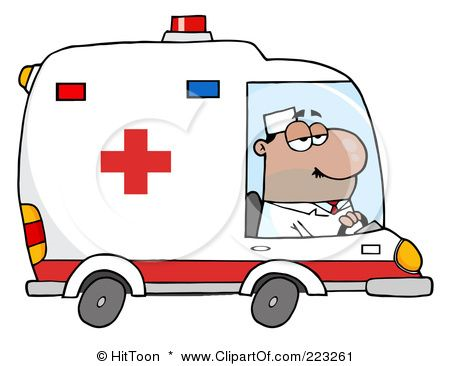

In [44]:
Nube_negativos = PIL.Image.open("ambulancia_2.png")

display(Nube_negativos)

In [45]:
mask_negative  = np.array(Nube_negativos)

In [46]:
t2 = []

def text_clean(row):
    temp2 = []
    text = row['tweets']
    text1 = row['tipo_sent']
    if text1 == 'NEGATIVE':
        temp2.append(text)
    
    t2.append(temp2)
    
data[['tweets']] = data.apply(text_clean, axis=1, result_type='expand')

In [47]:
negative = pd.DataFrame(t2)
negative.columns = ['tweets']

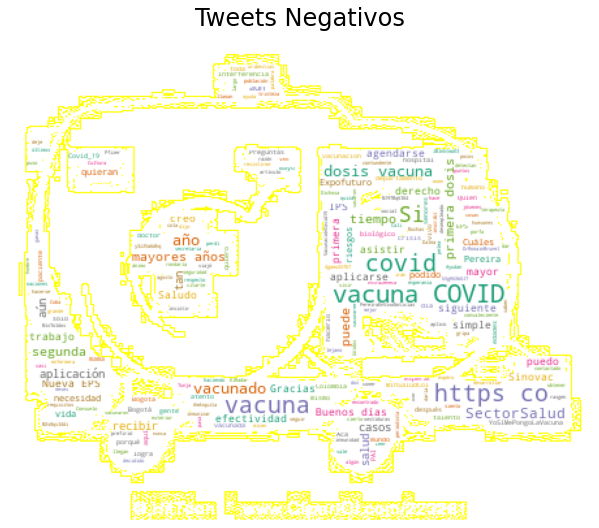

In [71]:
palabras = negative.tweets.str.cat(sep=',')

wordcloud = WordCloud(width=500, height=200,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2',
                     stopwords=stopwords,
                     mask=mask_negative, contour_width=0.5, contour_color='yellow').generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.tight_layout(pad=5)
plt.suptitle('Tweets Negativos',fontsize=24)  
plt.show()

In [49]:
data

,tweets,date,texto_limpio,links,hashtags,mentions,emojis,puntaje_sent,tipo_sent
0,None,2021-05-23 19:03:38,En Bogotá se han aplicado 1.644.709 dosis de l...,[https://t.co/UH9sA8h4cu],[],[],[],0.0000,NEUTRO
1,None,2021-05-23 18:37:03,Soy enfermera y trabajo con covid y aun no he...,[],[],[@SectorSalud],[],-0.2960,NEGATIVE
2,None,2021-05-23 18:00:00,Caldenses viajan en busca de las dosis. Dos mu...,[https://t.co/QDOrO0OmSO],[],[@lapatriacom],[],0.0000,NEUTRO
3,None,2021-05-23 17:43:24,✅ Sin su uso a los largo de los últimos años l...,[https://t.co/M197Bq6I64],[],[],"[✅, 🦠]",-0.7003,NEGATIVE
4,None,2021-05-23 17:29:01,| Se redujo proporcionalmente en 50% la morta...,[https://t.co/lGFSCSWbTI],[#EnNoticias],[],[✅],0.0000,NEUTRO
...,...,...,...,...,...,...,...,...,...
95,None,2021-05-20 18:38:25,Mi paciente de 94 años superó la Covid gracias...,[https://t.co/yQm6u7hgZW],[],[],"[🥰, 🙏]",0.7269,POSITIVE
96,None,2021-05-20 18:19:51,\nEl covid tiene vacuna Petro no,[],[#PetroEsLaPeorPandemia],[],[],-0.2960,NEGATIVE
97,None,2021-05-20 18:11:37,La mitad de mis amigos se fue de vacaciones/va...,[],[],[],"[😂, 🥲]",-0.2263,NEGATIVE
98,None,2021-05-20 18:10:49,"hola dr, he conocido dos casos cercanos de pe...",[],[],[@drhuerta],[],0.0000,NEUTRO


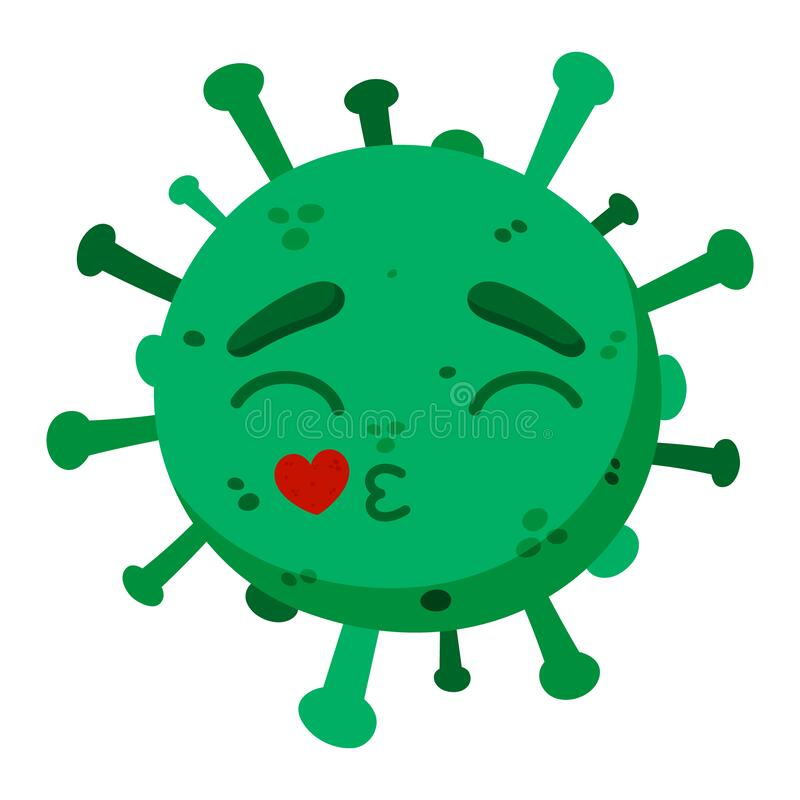

In [62]:
Nube_positive = PIL.Image.open("corona.png")

display(Nube_positive)

In [63]:
mask_positive_  = np.array(Nube_positive)

In [64]:
P_positivos = data.loc[:, 'puntaje_sent'] > 0
df_positivos = data.loc[P_positivos]

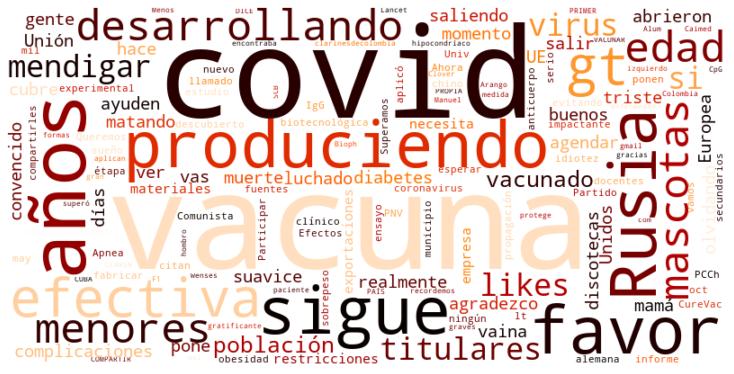

In [65]:
palabras=df_positivos.texto_limpio.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras)
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

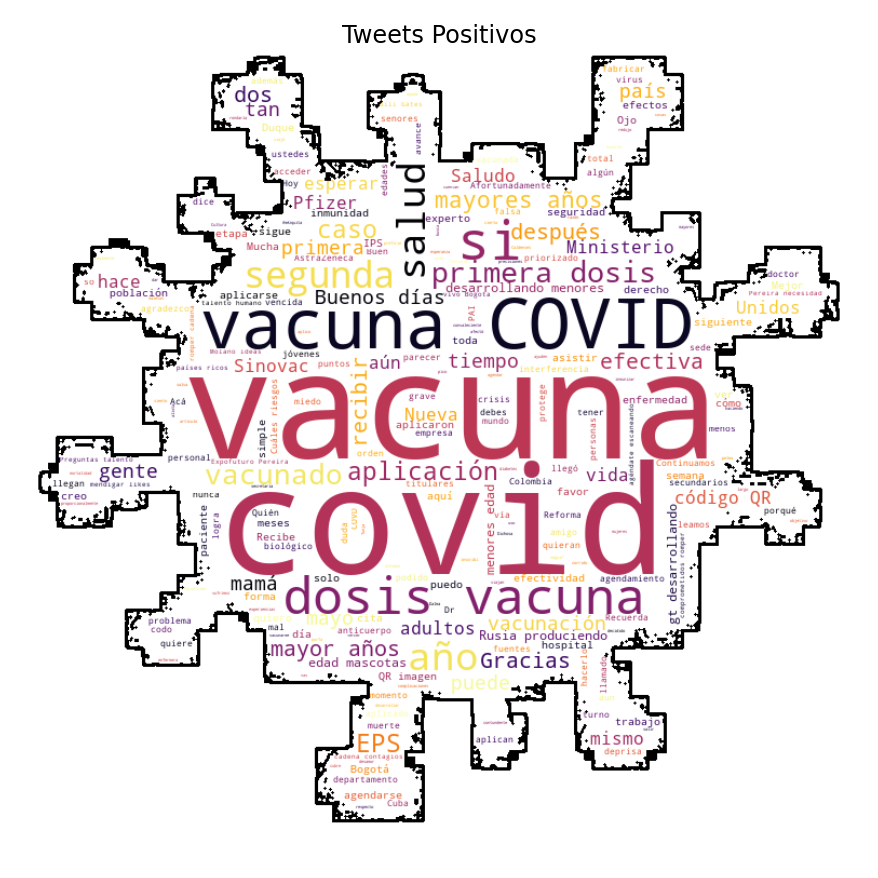

In [67]:
palabras = data.texto_limpio.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask_positive_, contour_width=4, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("corona.png")
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Tweets Positivos',fontsize=24) 
plt.show()